In [4]:
import pandas as pd

df = pd.read_csv('../data/assistments09/data.csv')

In [22]:
original_info = df.groupby('skill').agg({'correct': ['mean', 'count']})

In [40]:
original_info['skill_id'] = range(len(original_info))

In [35]:
original_info.columns = ["_".join(a) for a in original_info.columns.to_flat_index()]

In [45]:
original_info = original_info.reset_index().set_index('skill_id')

<AxesSubplot:xlabel='skill'>

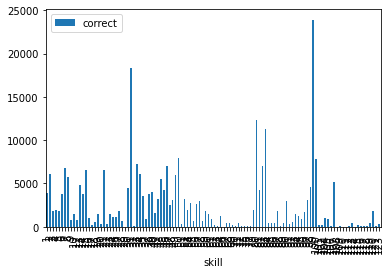

In [299]:
# df.groupby('user_id').agg({'correct': 'count'}).hist()
df.groupby('skill').agg({'correct': 'count'}).plot.bar()

<AxesSubplot:xlabel='skill'>

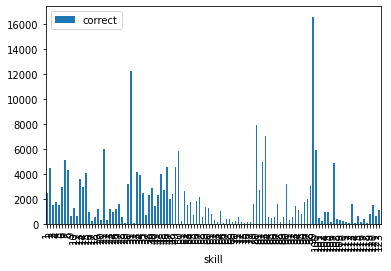

In [298]:
df_gen.groupby('skill').agg({'correct': 'count'}).plot.bar()

In [276]:
gen_info = df_gen.groupby('skill').agg({'correct': ['mean', 'count']})

array([[<AxesSubplot:title={'center':'correct'}>]], dtype=object)

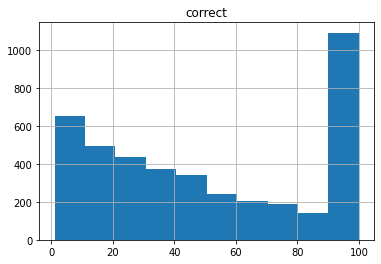

In [279]:
df_gen.groupby('user').agg({'correct': 'count'}).hist()

In [47]:
df.nunique()

user        4163
item       17716
skill        112
correct        2
wins         103
fails        143
dtype: int64

In [147]:
df.min(), df.max()

(user        0
 item       83
 skill       1
 correct     0
 wins        0
 fails       0
 dtype: int64,
 user         4162
 item       196456
 skill         123
 correct         1
 wins          102
 fails         142
 dtype: int64)

In [150]:
df.groupby('user').agg('count')['item'].describe()

count    4163.000000
mean       66.924574
std       129.860127
min         1.000000
25%         8.000000
50%        20.000000
75%        60.000000
max      1021.000000
Name: item, dtype: float64

In [19]:
df.groupby('user').agg({'skill': lambda l: ' '.join(map(str, l))}).to_csv('~/code/markov.py/demo/assist09.txt', index=None, header=None)

In [151]:
with open('/home/jj/code/markov.py/generated09.txt') as f:
    lines = f.read().splitlines()

In [1]:
with open('/home/jj/Téléchargements/fake09aku.txt') as f:
    lines = f.read().splitlines()

In [2]:
pairs = []
for i, line in enumerate(lines):
    tokens = line.split()
    pairs.extend(zip([i] * len(tokens), tokens))
# .to_csv('generated09.csv')

In [8]:
df_gen = pd.DataFrame(pairs, columns=('user', 'skill_id'))
df_gen.nunique(), df_gen.astype(int).max(), df_gen.min()

(user        4163
 skill_id     110
 dtype: int64,
 user        4162
 skill_id     111
 dtype: int64,
 user        0
 skill_id    0
 dtype: object)

In [43]:
df_gen['skill_id'] = df_gen['skill_id'].astype(int)

In [20]:
set(range(111)) - set(df_gen['skill_id'].astype(int).unique())

{97, 99}

In [44]:
df_gen.merge(original_info, on='skill_id')

,user,skill_id,correct_mean,correct_count,skill_id_
0,0,89,0.677840,23926,89
1,0,89,0.677840,23926,89
2,0,89,0.677840,23926,89
3,0,89,0.677840,23926,89
4,0,89,0.677840,23926,89
...,...,...,...,...,...
164464,2777,111,0.644013,309,111
164465,3090,111,0.644013,309,111
164466,4108,111,0.644013,309,111
164467,4108,111,0.644013,309,111


In [55]:
import numpy as np

coef = np.load('../data/assistments09/coef0.npy')

In [56]:
coef[0, -124 + 29]

-1.6204751957713404

In [57]:
from scipy.stats import norm

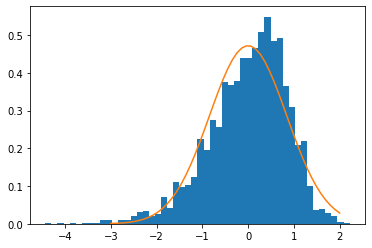

In [58]:
import matplotlib.pyplot as plt

x = np.linspace(-3, 2)
values = coef[0, :-124].reshape(-1)
plt.hist(values, density=True, bins=50)
plt.plot(x, norm(values.mean(), values.std()).pdf(x))

In [59]:
N_USERS = df_gen['user'].nunique()
sampled_thetas = norm(values.mean(), values.std()).rvs(N_USERS)

In [60]:
df_gen['theta'] = df_gen['user'].map(dict(zip(range(N_USERS), sampled_thetas)))
df_gen['skill_diff'] = df_gen['skill'].astype(int).map(dict(zip(range(1000), coef[0, -124:].reshape(-1))))

In [52]:
df_gen = df_gen.merge(original_info, on='skill_id')

In [53]:
df_gen.head()

,user,skill_id,skill,correct_mean,correct_count,skill_id_
0,0,89,99,0.67784,23926,89
1,0,89,99,0.67784,23926,89
2,0,89,99,0.67784,23926,89
3,0,89,99,0.67784,23926,89
4,0,89,99,0.67784,23926,89


In [61]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

df_gen['proba'] = df_gen.apply(lambda row: sigmoid(row['theta'] + row['skill_diff']), axis=1)

In [62]:
df_gen['correct'] = (np.random.random(len(df_gen)) < df_gen['proba']).astype(int)
df_gen.head()

,user,skill_id,skill,correct_mean,correct_count,skill_id_,theta,skill_diff,proba,correct
0,0,89,99,0.67784,23926,89,0.817083,0.163705,0.727265,1
1,0,89,99,0.67784,23926,89,0.817083,0.163705,0.727265,1
2,0,89,99,0.67784,23926,89,0.817083,0.163705,0.727265,0
3,0,89,99,0.67784,23926,89,0.817083,0.163705,0.727265,1
4,0,89,99,0.67784,23926,89,0.817083,0.163705,0.727265,1


In [63]:
# df_gen['skill'] = df_gen['skill'].astype(int)

In [64]:
df_gen['item'] = 0
df_gen['wins'] = 0
df_gen['fails'] = 0

In [66]:
df_gen.to_csv('../data/fake09aku/data.csv', index=False)

In [74]:
fake_coef = np.load('../data/fake09aku/coef0.npy')

In [75]:
fake_coef.shape

(1, 4287)

In [76]:
N_SKILLS = 1 + df_gen['skill'].max()

In [77]:
N_SKILLS

124

In [79]:
len(fake_coef[0]) - (df_gen['user'].max() + 1) - N_SKILLS

0

In [80]:
fake_skill_diff = pd.DataFrame(range(N_SKILLS), columns=('skill',)).sort_values('skill')
fake_skill_diff['skill_fake_diff'] = fake_coef[0, -N_SKILLS:]
fake_skill_diff = fake_skill_diff.set_index('skill')
fake_skill_diff

,skill_fake_diff
skill,
0,0.000000
1,0.159329
2,-0.465701
3,-0.193882
4,-0.855070
...,...
119,0.045558
120,-0.558856
121,0.449885


In [81]:
new_df = df_gen.join(fake_skill_diff, on='skill')

Text(0.5, 1.0, 'Errors in computing skill diff')

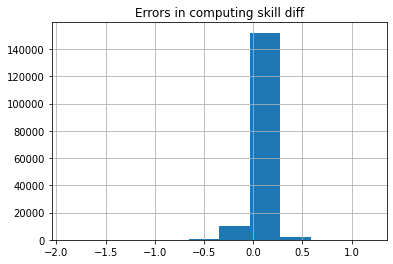

In [82]:
(new_df['skill_diff'] - new_df['skill_fake_diff']).hist()
plt.title('Errors in computing skill diff')

In [83]:
np.sqrt(((new_df['skill_diff'] - new_df['skill_fake_diff']) ** 2).mean())

0.0925324349942949

In [84]:
new_df.sort_values('skill_diff').drop_duplicates('skill').head()

,user,skill_id,skill,correct_mean,correct_count,skill_id_,theta,skill_diff,proba,correct,item,wins,fails,skill_fake_diff
163827,2650,75,85,0.136150,426,75,0.376879,-2.524320,0.104571,0,0,0,0,-2.328047
164446,3605,104,115,0.180180,222,104,-0.856924,-1.868429,0.061494,0,0,0,0,-1.321912
162532,4081,82,92,0.315682,491,82,0.082832,-1.769995,0.156149,0,0,0,0,-1.861461
164022,514,59,66,0.100000,10,59,-0.928070,-1.717558,0.066259,0,0,0,0,-0.932406
149604,2370,66,75,0.234043,47,66,0.256491,-1.701896,0.190710,0,0,0,0,-1.133366


In [85]:
new_df.sort_values('skill_fake_diff').drop_duplicates('skill').head()

,user,skill_id,skill,correct_mean,correct_count,skill_id_,theta,skill_diff,proba,correct,item,wins,fails,skill_fake_diff
163810,2267,75,85,0.136150,426,75,0.384225,-2.524320,0.105260,0,0,0,0,-2.328047
162496,1603,82,92,0.315682,491,82,-1.346859,-1.769995,0.042417,0,0,0,0,-1.861461
164003,413,67,76,0.333333,117,67,0.181438,-1.332741,0.240251,0,0,0,0,-1.657300
163880,2959,107,118,0.515152,33,107,-0.205082,-0.871771,0.254102,0,0,0,0,-1.434346
164431,1854,104,115,0.180180,222,104,-1.918728,-1.868429,0.022158,0,0,0,0,-1.321912


In [ ]:
from collections import Counter

Counter(df.groupby(["item", "skill"]).first().reset_index()['skill']).most_common()

In [ ]:
import numpy as np

coef = np.load('../data/assistments09/coef0.npy')

In [ ]:
coef.shape

In [ ]:
coef[0, :4163].mean()

In [ ]:
import matplotlib.pyplot as plt

plt.hist(coef[0, :4163], bins=50)

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  3.,  2.,  0.,  0.,  0.,
         2.,  1.,  2.,  1.,  2.,  4.,  2.,  4.,  3.,  3.,  5.,  6.,  2.,
         3., 18., 11.,  5.,  4.,  4.,  4.,  7.,  1.,  3.,  3.,  1.,  4.,
         1.,  4.,  1.,  2.,  1.,  1.,  0.,  0.,  1.,  0.,  1.]),
 array([-2.52431972, -2.43277606, -2.34123239, -2.24968873, -2.15814506,
        -2.0666014 , -1.97505773, -1.88351407, -1.7919704 , -1.70042674,
        -1.60888307, -1.51733941, -1.42579574, -1.33425208, -1.24270841,
        -1.15116475, -1.05962108, -0.96807742, -0.87653375, -0.78499009,
        -0.69344642, -0.60190276, -0.51035909, -0.41881543, -0.32727176,
        -0.2357281 , -0.14418443, -0.05264077,  0.0389029 ,  0.13044656,
         0.22199023,  0.31353389,  0.40507756,  0.49662122,  0.58816489,
         0.67970856,  0.77125222,  0.86279589,  0.95433955,  1.04588322,
         1.13742688,  1.22897055,  1.32051421,  1.41205788,  1.50360154,
         1.59514521,  1.68668887,  1.77823254,  1.8697762 ,

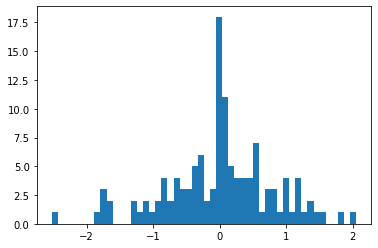

In [235]:
plt.hist(coef[0, 4163:], bins=50)

## Assistments 2012 with timestamps

In [238]:
df = pd.read_csv('../data/assistments12/preprocessed_data.csv', sep='\t')

In [240]:
from scipy.sparse import load_npz

q = load_npz('../data/assistments12/q_mat.npz')

In [245]:
from collections import Counter

Counter(q.sum(axis=1).A1)

Counter({1.0: 52981})

In [249]:
df['skill_id'] = df['item_id'].map(dict(zip(range(99999), q.argmax(axis=1).A1)))

In [251]:
df.head()

,user_id,item_id,timestamp,correct,inter_id,skill_id
0,4355,27076,0,0,0,191
1,3825,23707,85,1,1,64
2,3825,23680,103,0,2,64
3,4355,26976,122,1,3,191
4,3825,23625,190,0,4,64


In [252]:
df.to_csv('../data/assistments12/data.csv', index=False)

In [253]:
success_rates = df.groupby('user_id')['correct'].mean()

In [254]:
def compute_delays(user_id):
    times = df.query("user_id == @user_id")['timestamp'].to_numpy()
    times.sort()
    #print(times)
    #print(times[1:])
    #print(times[:-1])
    #print(times[1:] - times[:-1])
    plt.hist(np.log(times[1:] - times[:-1]))

def compute_median_delay(timestamps):
    # times = df.query("user_id == @user_id")['timestamp'].to_numpy()
    times = np.array(timestamps)
    times.sort()
    return np.median([value for value in times[1:] - times[:-1] if value < 10000])

In [255]:
median_delays = df.groupby('user_id').agg({'timestamp': compute_median_delay}).rename(columns={'timestamp': 'median_delay'})

/home/jj/.local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/jj/.local/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [256]:
df_win = success_rates.reset_index().join(median_delays)

In [258]:
has_replied = Counter(df['user_id'])

In [259]:
df_win['nb_replies'] = df_win['user_id'].map(has_replied)

In [260]:
df_win['log_median_delay'] = np.log(df_win['median_delay'])

In [261]:
df_win['median_delay'].describe()

count    24364.000000
mean        60.912104
std         92.963564
min          2.000000
25%         32.000000
50%         47.000000
75%         69.500000
max       6186.000000
Name: median_delay, dtype: float64

In [262]:
df_win.dropna().sort_values('median_delay').tail(10)

,user_id,correct,median_delay,nb_replies,log_median_delay
5010,5010,1.000000,1730.0,2,7.455877
13917,13917,0.833333,2051.0,6,7.626083
21737,21737,0.500000,2294.5,4,7.738270
21945,21945,0.000000,2732.0,2,7.912789
21744,21744,0.000000,3048.0,3,8.022241
10647,10647,1.000000,3076.0,3,8.031385
23928,23928,0.000000,3339.0,2,8.113427
21944,21944,0.000000,4929.0,2,8.502891
12256,12256,0.000000,5016.0,2,8.520388
12250,12250,0.500000,6186.0,2,8.730044


<AxesSubplot:>

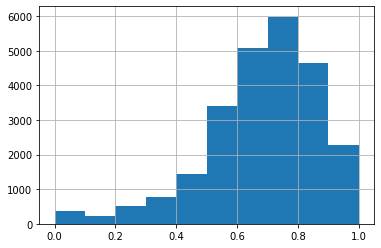

In [263]:
df_win['correct'].hist()

<AxesSubplot:xlabel='correct', ylabel='median_delay'>

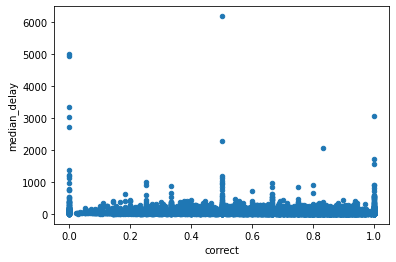

In [264]:
df_win.plot.scatter(x='correct', y='median_delay')

<AxesSubplot:>

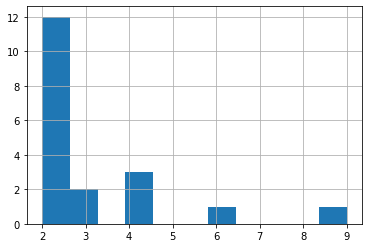

In [265]:
df_win.dropna().query('median_delay > 1e3')['nb_replies'].hist(bins=11)

<AxesSubplot:xlabel='correct', ylabel='log_median_delay'>

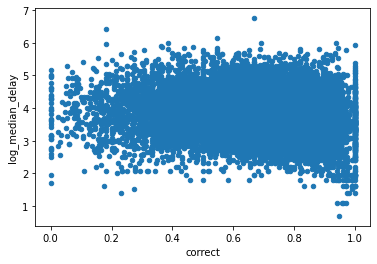

In [266]:
df_win.query('nb_replies > 10').plot.scatter(x='correct', y='log_median_delay')

In [267]:
df_for_disp = df_win.query('nb_replies > 10').dropna()

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
        0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
        0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
        0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
        0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
        0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
        0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
        0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
        0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
        0.99, 1.  ]),
 array([0.69314718, 0.75376175, 0.81437632, 0.87499089, 0.93560

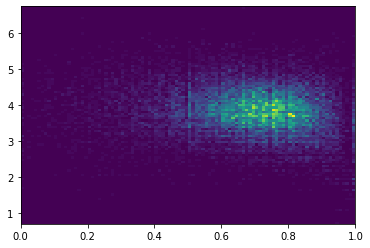

In [268]:
plt.hist2d(df_for_disp['correct'], y=df_for_disp['log_median_delay'], bins=100)

In [269]:
%%time
median_delay_of = dict([(user_id, compute_median_delay(user_id)) for user_id in df['user_id'].unique()])
median_delay_of

AxisError: axis -1 is out of bounds for array of dimension 0

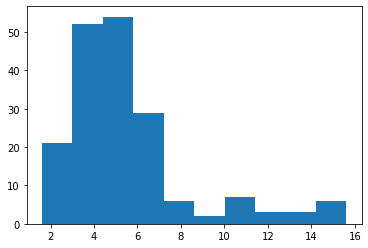

In [270]:
compute_delays(4355)

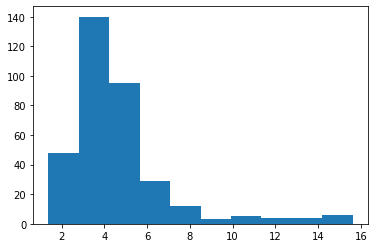

In [271]:
compute_delays(3825)

In [ ]:
df['user_id'].unique()

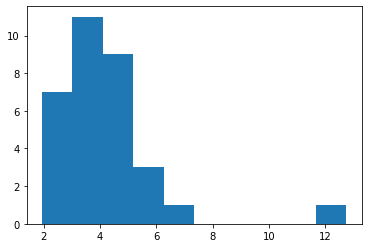

In [272]:
compute_delays(5026)

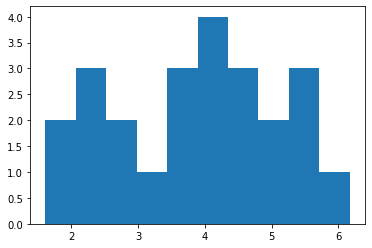

In [273]:
compute_delays(24748)